In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

import wrangle_utils as wu
import explore_utils as eu
import model_utils as mu
import env

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Pull in the data

In [3]:
# query = """
# SELECT * 
# FROM sales
#     JOIN items USING (item_id)
#     JOIN stores USING (store_id);
# """

In [4]:
# df = pd.read_sql(query, env.get_db_url('tsa_item_demand'))

In [5]:
df = pd.read_csv('sales.csv')

# 
# Using your store items data:

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## Convert date column to datetime format.

In [6]:
df = df.rename(columns={'sale_date': 'date'})

In [7]:
df.head()

,Unnamed: 0,store_id,item_id,sale_id,date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [8]:
df= df.drop(columns='Unnamed: 0')

In [9]:
# Convert the date column to datetime data
df.date = pd.to_datetime(df.date)

## Plot the distribution of sale_amount and item_price.

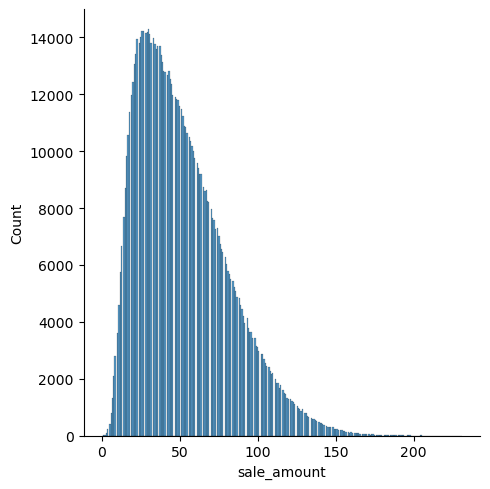

In [10]:
# Plot sale_amount
sns.displot(df.sale_amount)

In [11]:
# Looks somewhat normal

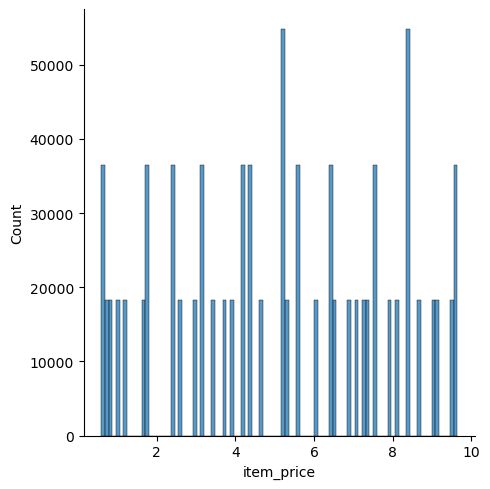

In [12]:
# Plot item_price
sns.displot(df.item_price)

In [13]:
# Somewhat uniform, no clear pattern

## Set the index to be the datetime variable.

In [14]:
# Set the date as the index
df = df.set_index('date')

## Add a 'month' and 'day of week' column to your dataframe.

In [15]:
# Set a column that carries the name of the month of the observation
df['month'] = df.index.month_name()

In [16]:
# Set a column that carries the name of the day of the observation
df['day_of_week'] = df.index.day_name()

## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [17]:
# Multiply sale_amount by item_price and assign to a column called sales_total
df['sales_total'] = df.sale_amount * df.item_price

## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
#Sets the code above into a function
def acquire_sales_data():
    """
    Pulls in the sales data from a csv, does some cleaning and sets the date to a TimeIndex
    """
    df = pd.read_csv('sales.csv')

    #Rename sale_date to 'date'
    df = df.rename(columns={'sale_date': 'date'})
    df= df.drop(columns='Unnamed: 0')

    # Convert the date column to datetime data
    df.date = pd.to_datetime(df.date)

    # Plot sale_amount
    sns.displot(df.sale_amount)

    # Plot item_price
    sns.displot(df.item_price)

    # Set the date as the index
    df = df.set_index('date')

    # Set a column that carries the name of the month of the observation
    df['month'] = df.index.month_name()

    # Set a column that carries the name of the day of the observation
    df['day_of_week'] = df.index.day_name()

    # Multiply sale_amount by item_price and assign to a column called sales_total
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

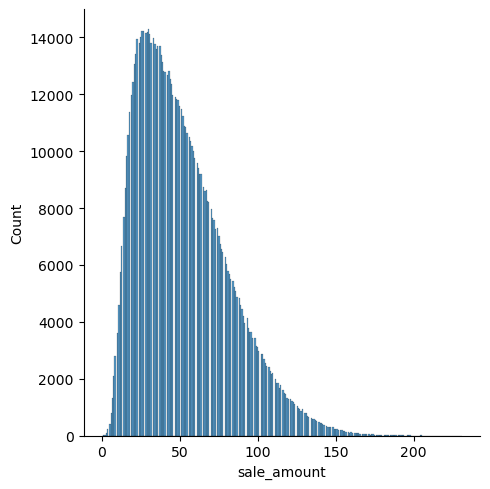

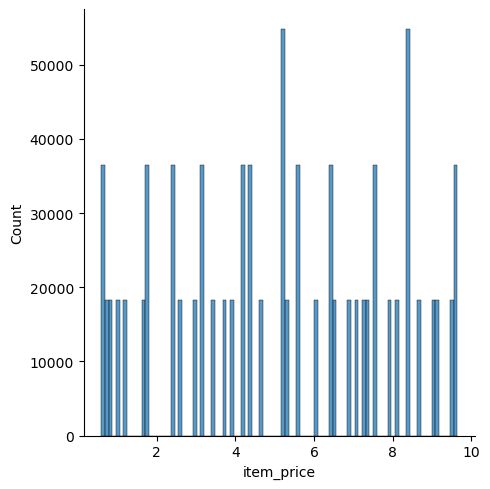

In [19]:
# Test the function
df = acquire_sales_data()

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [21]:
df = pd.read_csv('opsd_germany_daily.csv')

In [22]:
df = wu.normalize_column_names(df)

In [23]:
df = df.rename(columns={'wind+solar': 'wind_solar'})

In [24]:
df.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


## Convert date column to datetime format.

In [25]:
df.date = pd.to_datetime(df.date)

## Plot the distribution of each of your variables.

<Axes: >

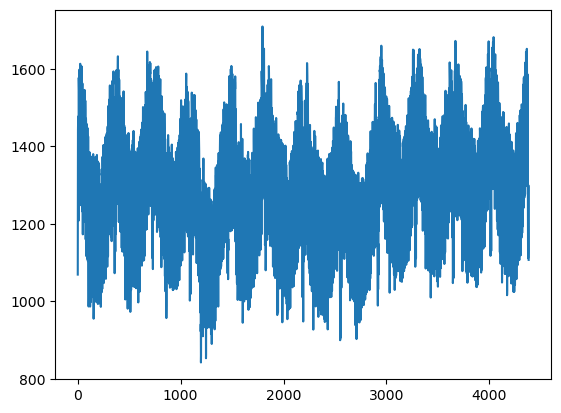

In [27]:
df.consumption.plot()

<Axes: >

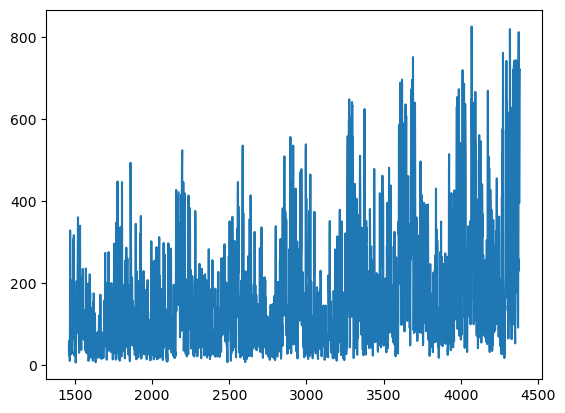

In [28]:
df.wind.plot()

<Axes: >

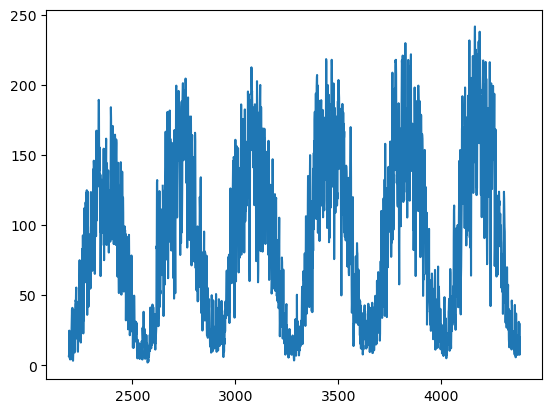

In [29]:
df.solar.plot()

<Axes: >

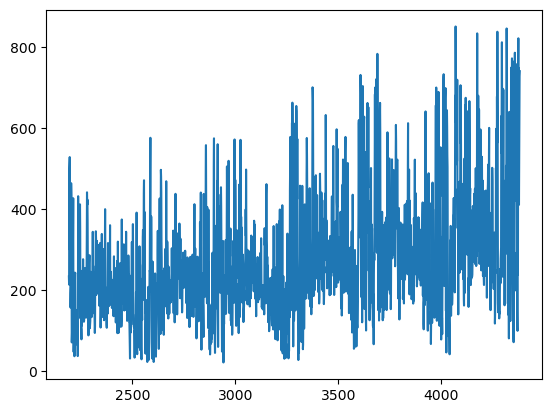

In [31]:
df.wind_solar.plot()

## Set the index to be the datetime variable.

In [32]:
df = df.set_index('date')

## Add a month and a year column to your dataframe.

In [33]:
df['month'] = df.index.month_name()

In [34]:
df['year'] = df.index.year

In [35]:
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


## Fill any missing values.

In [36]:
# Check for missing values
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Number of rows: 4383
Number of days between first and last day: 4383 days 00:00:00


In [37]:
df.index.value_counts().value_counts()

1    4383
Name: date, dtype: int64

## there is an observation made every day between the initial observation and the final observation

#
## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def acquire_german_daily():
    """
    Opens opsd_german_daily and normalizes the names
    """
    df = pd.read_csv('opsd_germany_daily.csv')
    df = wu.normalize_column_names(df)
    df = df.rename(columns={'wind+solar': 'wind_solar'})
    return df

In [ ]:
def time_graph_all_columns(df):
    """
    Graphs all features over time
    """
    for col in df.columns:
        df.resample("M")[col].agg('mean').plot()
        plt.title(f'{col} over time')
        plt.show()

In [ ]:
def add_month_year(df):
    """
    Adds a month and year column. to a dataframe with a TimeIndex. Outputs the updated dataframe
    """
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    return df

In [ ]:
def check_time_nulls(timeindex):
    """
    Checks the time range of the data and compares it against the number of the observations
    """
    print('Number of rows:', timeindex.nunique())
    n_days = timeindex.max() - timeindex.min() + pd.Timedelta('1d')
    print(f"Number of days between first and last day:", n_days)
    print(df.index.value_counts().value_counts())